In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter

In [2]:
curdir = "final_dataset/yaleB/"
X = np.zeros((2415-38, 32256))
Y = np.zeros(2415-38)

#testing purposes###############
Xtest = np.zeros((38, 32256))
Ytest = np.zeros(38)
####################

j = 0
i = 0
count1 = 0
count2 = []
avgFaces = []
for subdir in os.listdir(curdir):
    person = os.path.join(curdir,subdir)
    count = 0
    avgFace = []
    for imagefile in os.listdir(person):
        #checking if imagefile, also removing ambient image
        
        ##############################
        if((imagefile.endswith("P00A-005E-10.pgm"))):
            #image location
            imageloc = os.path.join(person, imagefile)
            #loaded image
            image = plt.imread(imageloc)
            
            #which person is loaded in, not used yet
            curperson = int(subdir[5:])-1
            # print(curperson)
            if(curperson>13):
                curperson -= 1
                
            Xtest[j,:] = image.flatten()
            Ytest[j] = curperson
            j+=1 
            continue
        #####################################
        if(imagefile.endswith(".pgm")):
            # print(imagefile)
            count +=1
            #image location
            imageloc = os.path.join(person, imagefile)
            #loaded image
            image = plt.imread(imageloc)
            
            #which person is loaded in, not used yet
            curperson = int(subdir[5:])-1
            # print(curperson)
            if(curperson>13):
                curperson -= 1
            X[i,:] = image.flatten()
            avgFace.append(X[i,:])
            Y[i] = curperson
            i+=1
    avgFace = np.sum(np.array(avgFace),axis = 0)/count
    avgFaces.append((avgFace,curperson))
    count2.append(count)
    count1 += count
    # print(count)
print(count1)

2377


(2377, 32256)


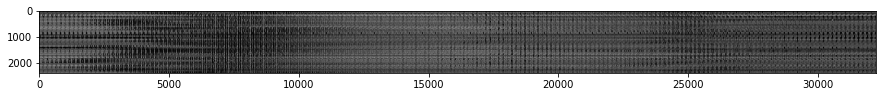

In [3]:
plt.figure(figsize=(15,15))
plt.imshow(X,cmap='gray')
print(X.shape)

192 168


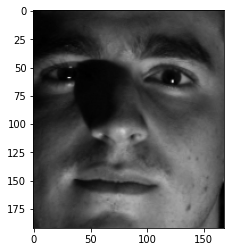

In [4]:
img = plt.imread(imageloc)
h,w = img.shape
plt.imshow(img,cmap='gray')
print(h,w)

In [5]:
aV = np.zeros((38, 32256))

for i in range(len(avgFaces)):
    aV[avgFaces[i][1]] = avgFaces[i][0]

In [6]:
indices = np.argsort(Y)
print(indices)
Ytrain = Y[indices]
print(Ytrain)
Xtrain = X[indices,:]
print((Xtrain))

[ 282  283  284 ... 2342 2344 2376]
[ 0.  0.  0. ... 37. 37. 37.]
[[  4.   4.   4. ...  92. 111. 107.]
 [109. 108. 115. ...   5.   6.   5.]
 [ 71.  83.  90. ...   4.   5.   7.]
 ...
 [121. 119. 120. ...   0.   0.   0.]
 [127. 128. 136. ...   1.   1.   2.]
 [  4.   5.   6. ...   1.   1.   1.]]


In [7]:
u, ind = np.unique(Y,return_inverse=True)

In [8]:
print(str(ind))
checker = np.arange(0, 38, 1)
for i in range(Y.shape[0]):
    if checker[int(Y[i])] == 0:
        continue
    else:
        checker[int(Y[i])] = 0
        print(Y[i])

[25 25 25 ... 37 37 37]
25.0
28.0
12.0
20.0
11.0
5.0
15.0
23.0
2.0
10.0
17.0
19.0
26.0
33.0
32.0
30.0
14.0
18.0
3.0
29.0
13.0
4.0
7.0
8.0
21.0
27.0
35.0
9.0
22.0
1.0
16.0
6.0
24.0
34.0
31.0
36.0
37.0


In [9]:
X_t = Xtrain

In [10]:
A = X_t.T
mean_imgs = np.reshape(A.mean(axis = 1),(32256,1))
A = A - mean_imgs
print(A.shape)

(32256, 2377)


In [11]:
print(A.mean(axis = 1).shape)
print(aV.shape)

(32256,)
(38, 32256)


In [12]:
aV = aV - mean_imgs.T

In [13]:
print(aV)
print(mean_imgs)
# print(aV - mean_imgs.T)

[[ 16.50181301  15.15150483  16.53501479 ... -19.10522133 -14.41557652
  -10.11430308]
 [ 12.85101936  13.69118737  13.90009416 ...  34.41858819  35.48918538
   36.6634747 ]
 [ 24.64467015  26.21499689  28.10644336 ...  -3.20045943  -1.06637017
    4.69522073]
 ...
 [ -0.86326636  -1.53103485  -1.84593759 ... -40.3750626  -39.22510033
  -38.32065228]
 [-15.32358382 -16.51516184 -16.57609632 ...  13.05350882  13.75902665
   13.71109375]
 [  9.83514634  10.23086991  10.29691955 ... -40.80363403 -40.7965289
  -39.92382689]]
[[61.45056794]
 [62.54690787]
 [63.48085822]
 ...
 [42.99411022]
 [41.87589398]
 [41.27303324]]


In [14]:
#we use A.T @ A and not A @ A.T for lesser computational complexity
U,D,Vt = np.linalg.svd(A.T @ A)
V = Vt.T
evects = A @ V
norm = np.linalg.norm(evects,axis=0)
evects = evects / norm

In [15]:
print(evects)
print(evects.shape)

[[ 0.00254187 -0.00749923 -0.00221469 ... -0.00426879 -0.00499514
  -0.00425629]
 [ 0.00246804 -0.00761651 -0.00190839 ... -0.00249182 -0.00541058
   0.00519129]
 [ 0.00231151 -0.00771143 -0.00161881 ... -0.00153863  0.00111507
   0.00052462]
 ...
 [-0.00253187  0.00434242 -0.0057332  ... -0.00349727 -0.00807898
  -0.00179757]
 [-0.00234398  0.0042338  -0.00560569 ... -0.00077041 -0.00945867
   0.00139276]
 [-0.00224071  0.00420553 -0.0055224  ... -0.00374815 -0.00602249
   0.01818701]]
(32256, 2377)


In [16]:
def reducedA(k,eV,A):
    Areduced = (eV[:,:k].T @ A)
    Arecovered = (eV[:,:k] @ Areduced)
    return Arecovered

In [17]:
A1 = reducedA(5,evects,A)
A2 = reducedA(10,evects,A)

In [18]:
A3 = reducedA(100,evects,A)
A4 = reducedA(1000,evects,A)

2 examples of reconstruction using different number of eigenfaces taken


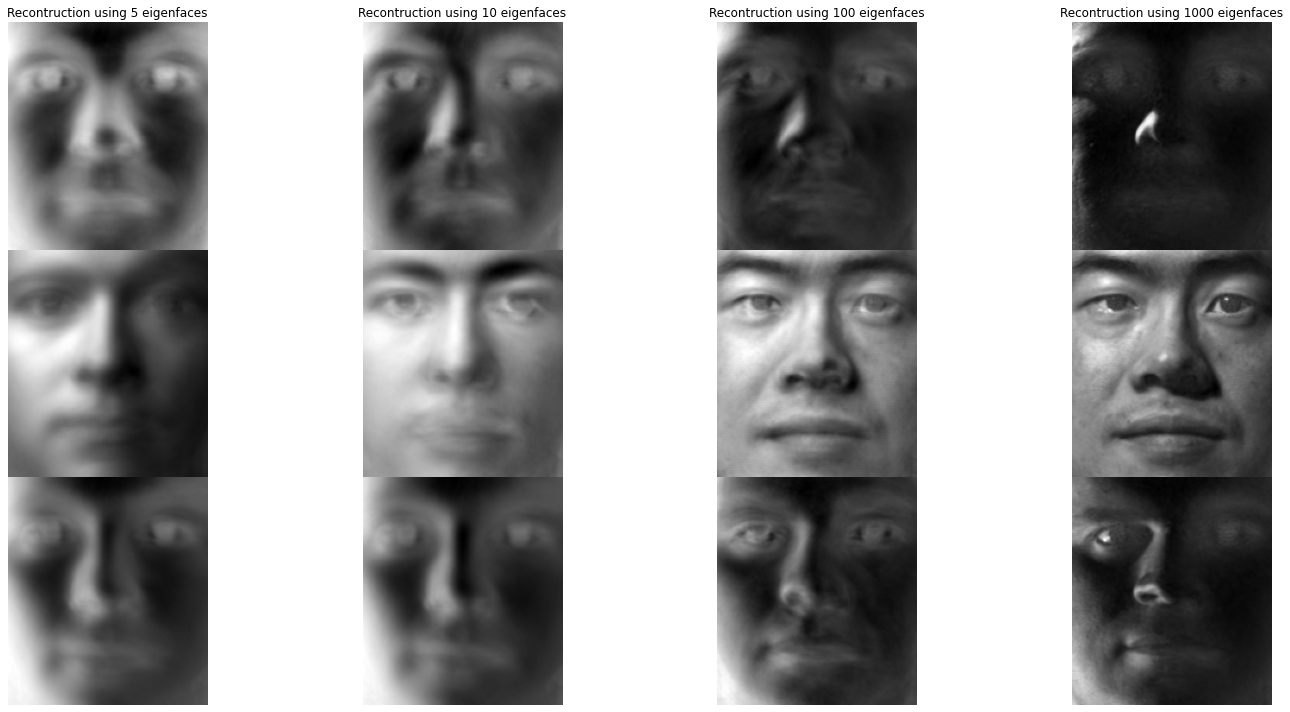

In [19]:
print("2 examples of reconstruction using different number of eigenfaces taken")
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(3, 4, 1)
plt.imshow(A1[:,60].reshape((h,w)),cmap = 'gray')
plt.title("Recontruction using 5 eigenfaces")
plt.axis("off")
fig.add_subplot(3, 4, 2)
plt.imshow(A2[:,60].reshape((h,w)),cmap = 'gray')
plt.title("Recontruction using 10 eigenfaces")
plt.axis("off")
plt.tight_layout()
fig.add_subplot(3, 4, 3)
plt.imshow(A3[:,60].reshape((h,w)),cmap = 'gray')
plt.title("Recontruction using 100 eigenfaces")
plt.axis("off")
fig.add_subplot(3, 4, 4)
plt.imshow(A4[:,60].reshape((h,w)),cmap = 'gray')
plt.title("Recontruction using 1000 eigenfaces")
plt.axis("off")
plt.tight_layout()
fig.add_subplot(3, 4, 5)
plt.imshow(A1[:,90].reshape((h,w)),cmap = 'gray')
plt.axis("off")
fig.add_subplot(3, 4, 6)
plt.imshow(A2[:,90].reshape((h,w)),cmap = 'gray')
plt.axis("off")
plt.tight_layout()
fig.add_subplot(3, 4, 7)
plt.imshow(A3[:,90].reshape((h,w)),cmap = 'gray')
plt.axis("off")
fig.add_subplot(3, 4, 8)
plt.imshow(A4[:,90].reshape((h,w)),cmap = 'gray')
plt.axis("off")
plt.tight_layout()
fig.add_subplot(3, 4, 9)
plt.imshow(A1[:,190].reshape((h,w)),cmap = 'gray')
plt.axis("off")
fig.add_subplot(3, 4, 10)
plt.imshow(A2[:,190].reshape((h,w)),cmap = 'gray')
plt.axis("off")
plt.tight_layout()
fig.add_subplot(3, 4, 11)
plt.imshow(A3[:,190].reshape((h,w)),cmap = 'gray')
plt.axis("off")
fig.add_subplot(3, 4, 12)
plt.imshow(A4[:,190].reshape((h,w)),cmap = 'gray')
plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis("off")
plt.show()

In [20]:
def which_trained_face(test_img, espace, mean_face, X_train,Y_train):
    smallest_norm = None
    person = None
    
    out = None
    test_img = np.reshape(test_img,(32256, 1))
    test_img = test_img - mean_face
    
    for i in range(X_train.shape[0]):
        cur_img = np.reshape(X_train[i],(32256, 1)) - mean_face
        reduced_img = (espace.T @ cur_img)
        test_img_espace = espace.T @ test_img
        
        compare = reduced_img - test_img_espace
        norm = np.linalg.norm(compare)
        
        if smallest_norm == None:
            smallest_norm = norm
            person = Y_train[i]
        if smallest_norm > norm:
            smallest_norm = norm
            person = Y_train[i]
#             print(test_img_espace.shape)
            out = cur_img
#             print(i)
#     print("DOEN")
    return smallest_norm,person,out

In [21]:
sN_mainData = []
per = []
out = []
for i in range(len(Xtest)):
    sN1,per1,out1 = which_trained_face(Xtest[i], evects[:,0:10], mean_imgs, Xtrain,Ytrain)
    sN_mainData.append(sN1)
    per.append(per1)
    out.append(out1)
sN_mainData

[2397.2508313255157,
 1532.906950925167,
 2359.6213241787395,
 1925.0901227957938,
 1830.3175727218363,
 1693.8681341364759,
 2093.248138753928,
 2023.5921264363908,
 2111.6598084141738,
 2705.46595801861,
 1603.3402747706837,
 1817.3939550808977,
 2001.9003601905808,
 2191.2468539247197,
 1313.039186187722,
 2216.4759517281414,
 1830.5055523526014,
 3025.108509172214,
 1583.016344419608,
 1263.4612391344215,
 1545.3390651362686,
 2059.46712725976,
 2884.837654073733,
 1758.1687376497837,
 1663.3374943440144,
 2087.602334767195,
 2818.028950466985,
 1894.6804287105917,
 2912.1496657071352,
 1510.804533249324,
 1830.9619817969754,
 2083.519894140591,
 1771.5091906325329,
 1872.2585801310686,
 2216.5498668325695,
 1721.4867540540622,
 1528.5139607157432,
 1490.5315717321344]

## Test for non-faces

In [24]:
import glob
link = []
link = glob.glob('final_dataset/PinDown__faces-of-everyday-objects/*.jpg')
len(link)

20

In [25]:
import cv2
imgTemp = []
for i in range(len(link)):
    img = cv2.imread(link[i],0)
    img = cv2.resize(img,(168,192),interpolation = cv2.INTER_AREA)
    imgTemp.append(img)
len(imgTemp)

20

In [26]:
def show(imgs,names,rows,cols):
    fig = plt.figure(figsize = (15,15))
    for num in range(len(imgs)):
        i,j = num/cols, num%cols
        i = int(i)
        ax = fig.add_subplot(rows, cols, num+1)
        ax.imshow(imgs[num], cmap = 'gray')
        ax.set_title(names[num])
    plt.show()

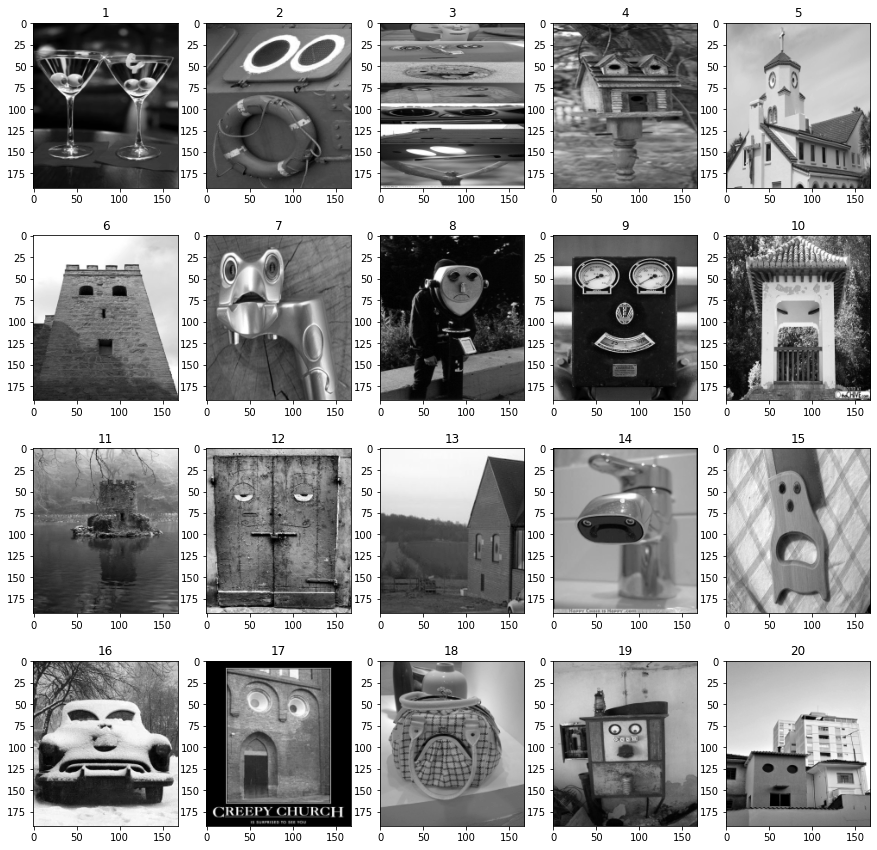

In [27]:
names = ["1",
         "2",
         "3",
         "4",
         "5",
         "6",
         "7",
         "8",
         "9",
         "10",
         "11",
         "12",
         "13",
         "14",
         "15",
         "16",
         "17",
         "18",
         "19",
         "20"]
show(imgTemp,names,4,5)

In [28]:
sN_noFace = []
per_noFace = []
out_noFace = []
for i in range(20):
    sN1,per1,out1 = which_trained_face(imgTemp[i], evects[:,0:10], mean_imgs, Xtrain,Ytrain)
    sN_noFace.append(sN1)
    per_noFace.append(per1)
    out_noFace.append(out1)

In [29]:
Y_predFace_noFace = []
for i in range(len(sN_noFace)):
    flag = 0
    if sN_noFace[i]>3500:
        print(f"The image {i+1} is a non-face with a norm value = {sN_noFace[i]}")
        flag = 0
    else:
        print(f"The image {i+1} is a face with a norm value = {sN_noFace[i]}")
        flag = 1
    Y_predFace_noFace.append(flag)

The image 1 is a non-face with a norm value = 3912.037319758181
The image 2 is a non-face with a norm value = 3827.834836934471
The image 3 is a non-face with a norm value = 4053.30177748471
The image 4 is a non-face with a norm value = 4130.644896155024
The image 5 is a non-face with a norm value = 4472.399165190887
The image 6 is a non-face with a norm value = 7769.131228342991
The image 7 is a face with a norm value = 2823.0215142882957
The image 8 is a non-face with a norm value = 3697.379100472241
The image 9 is a non-face with a norm value = 5212.356254262939
The image 10 is a face with a norm value = 2412.541531872113
The image 11 is a non-face with a norm value = 4779.4789209820965
The image 12 is a non-face with a norm value = 4267.184657190386
The image 13 is a non-face with a norm value = 5430.402722241033
The image 14 is a non-face with a norm value = 5123.492457391926
The image 15 is a non-face with a norm value = 5452.4204315788365
The image 16 is a non-face with a norm v

In [30]:
Y_actFace_noFace = np.zeros(20,dtype='int')
Y_predFace_noFace

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [31]:
names = []
c2 = 0
for i in range(len(sN_noFace)):
    if Y_predFace_noFace[i] ==1:
        c2 +=1
        names.append("Incorrectly found as face")
    else:
        names.append("Correctly found as no-face")

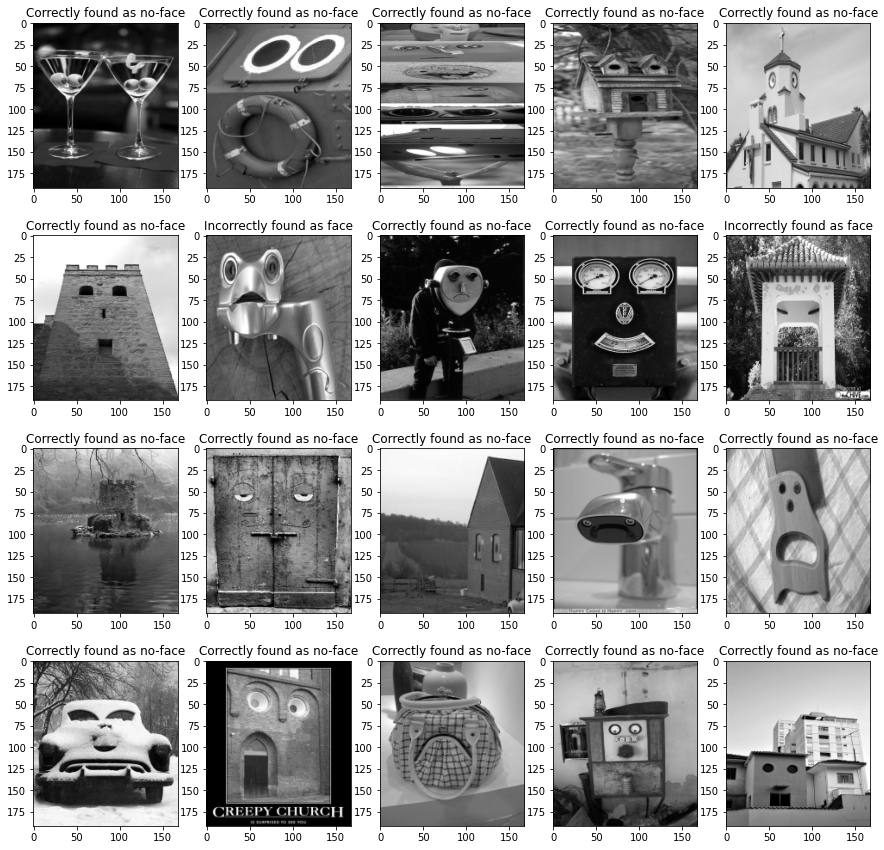

In [32]:
show(imgTemp,names,4,5)

In [33]:
print(f"Final accuracy of test images for no-face = {100-(c2/len(sN_noFace)*100)}%")

Final accuracy of test images for no-face = 90.0%


## Test for faces and non-faces combined

In [37]:
imgTemp1 = cv2.imread('final_dataset/misc/nonFace.png',0)
imgTemp2 = cv2.imread('final_dataset/misc/Mona.jpg',0)
imgTemp3 = cv2.imread('final_dataset/misc/manFace1.jpeg',0)
imgTemp4 = cv2.imread('final_dataset/misc/nonFace2.jpeg',0)
imgTemp5 = cv2.imread('final_dataset/misc/dogFace.jpg',0)
imgTemp6 = cv2.imread('final_dataset/misc/manFace2.jpeg',0)
imgTemp7 =  cv2.resize(cv2.imread('final_dataset/at&t/s1/4.pgm',0),  (168,192), interpolation = cv2.INTER_AREA)
imgTemp8 =  cv2.resize(cv2.imread('final_dataset/at&t/s2/8.pgm',0),  (168,192), interpolation = cv2.INTER_AREA)
imgTemp9 =  cv2.resize(cv2.imread('final_dataset/at&t/s3/9.pgm',0),  (168,192), interpolation = cv2.INTER_AREA)
imgTemp10 = cv2.resize(cv2.imread('final_dataset/at&t/s4/3.pgm',0), (168,192), interpolation = cv2.INTER_AREA)
imgTemp11 = cv2.resize(cv2.imread('final_dataset/at&t/s5/7.pgm',0), (168,192), interpolation = cv2.INTER_AREA)
imgTemp12 = cv2.resize(cv2.imread('final_dataset/at&t/s6/2.pgm',0),  (168,192), interpolation = cv2.INTER_AREA)
imgTemp13 = cv2.resize(cv2.imread('final_dataset/at&t/s7/1.pgm',0),  (168,192), interpolation = cv2.INTER_AREA)
imgTemp14 = cv2.resize(cv2.imread('final_dataset/at&t/s8/3.pgm',0),  (168,192), interpolation = cv2.INTER_AREA)
imgTemp15 = cv2.resize(cv2.imread('final_dataset/at&t/s9/5.pgm',0), (168,192), interpolation = cv2.INTER_AREA)
imgTemp16 = cv2.resize(cv2.imread('final_dataset/at&t/s10/6.pgm',0), (168,192), interpolation = cv2.INTER_AREA)
imgTemp = [imgTemp1,
           imgTemp2,
           imgTemp3,
           imgTemp4,
           imgTemp5,
           imgTemp6,
           imgTemp7,
           imgTemp8,
           imgTemp9,
           imgTemp10,
           imgTemp11,
           imgTemp12,
           imgTemp13,
           imgTemp14,
           imgTemp15,
           imgTemp16]

Y_testFace = [0,
              0,
              1,
              0,
              0,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,]

In [39]:
sN = []
out = []
per = []
for i in range(len(imgTemp)):
    sN1,per1,out1 = which_trained_face(imgTemp[i], evects[:,0:10], mean_imgs, Xtrain,Ytrain)
    sN.append(sN1)
    out.append(out1)
    per.append(per1)

In [40]:
Y_predFace_Face = []
for i in range(len(sN)):
    flag = 0
    if sN[i]>3500:
        print(f"The image {i+1} is a non-face with a norm value = {sN[i]}")
        flag = 0
    elif sN[i]<2000:
        print(f"The image {i+1} is a part of training set with a norm value = {sN[i]}")
    else:
        print(f"The image {i+1} is a face with a norm value = {sN[i]}")
        flag = 1
    Y_predFace_Face.append(flag)

The image 1 is a non-face with a norm value = 3989.43439927668
The image 2 is a non-face with a norm value = 5660.874041000071
The image 3 is a face with a norm value = 2937.867495425877
The image 4 is a non-face with a norm value = 3954.810284565298
The image 5 is a non-face with a norm value = 4493.215199307929
The image 6 is a non-face with a norm value = 6200.635970549818
The image 7 is a non-face with a norm value = 3657.8469111029444
The image 8 is a face with a norm value = 2388.379342496478
The image 9 is a face with a norm value = 2468.5731282399747
The image 10 is a face with a norm value = 3279.615593180551
The image 11 is a face with a norm value = 2675.4510050185454
The image 12 is a non-face with a norm value = 3964.4535278595363
The image 13 is a face with a norm value = 2794.017858913732
The image 14 is a face with a norm value = 2402.2031613187755
The image 15 is a face with a norm value = 3324.0119341189866
The image 16 is a face with a norm value = 3358.443854401269


In [41]:
print(Y_testFace)
print(Y_predFace_Face)

[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1]


In [42]:
names = []
c3 = 0
for i in range(len(sN)):
    if Y_predFace_Face[i] !=Y_testFace[i]:
        c3 +=1
        names.append("Incorrectly found")
    else:
        names.append("Correctly found")

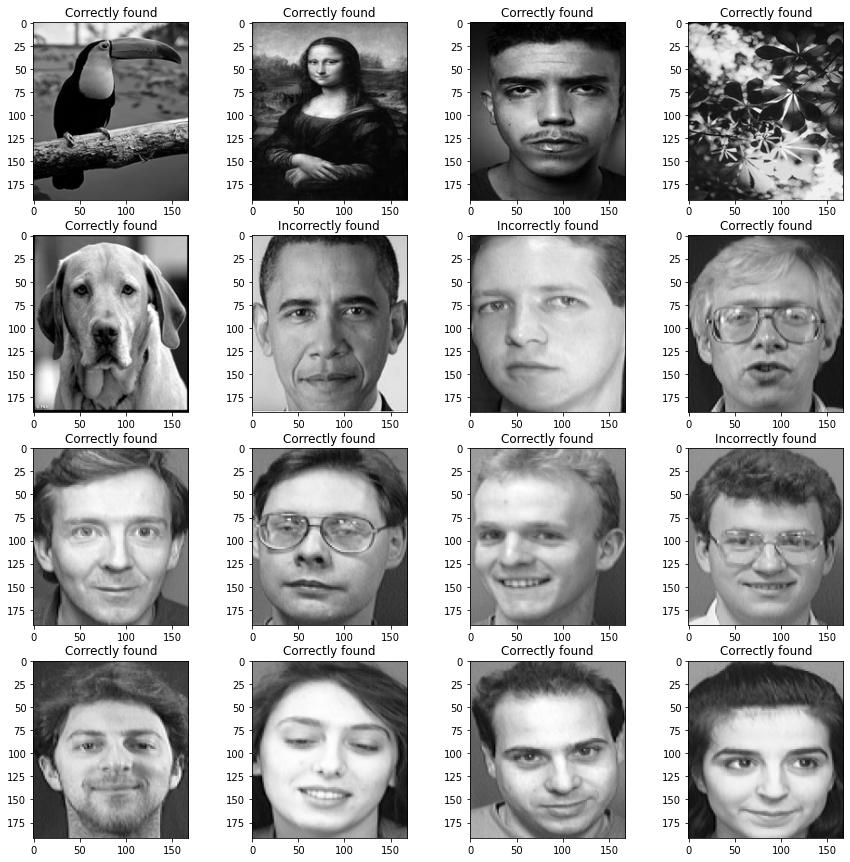

In [43]:
show(imgTemp,names,4,4)

In [44]:
print(f"Final accuracy of test images for no-face = {100-(c3/len(sN)*100)}%")

Final accuracy of test images for no-face = 81.25%
